# Проект - случайное блуждание 



# Случайное блуждание
Случайным блужданием (random walk) называется путь, который не имеет четкого
направления, но определяется серией полностью случайных решений. Представьте, что
муравей сошел с ума и делает каждый новый шаг в случайном направлении; его путь
напоминает случайное блуждание.
Случайное блуждание находит практическое применение в естественных науках:
физике, биологии, химии и экономике. Например, пыльцевое зерно на поверхности
водяной капли движется по поверхности воды, потому что его постоянно
подталкивают молекулы воды. Молекулярное движение в капле воды случайно, поэтому
путь пыльцевого зерна на поверхности представляет собой случайное блуждание. 

##  Разбитие проекта на подзадачи
К нашему счастью, проект уже разбит на подзадачи, что значительно упрощает работу 

* (2 балла) Разработайте класс RandomWalk, который принимает случайные решения по
выбору направления и расстоянию. Классу нужны три атрибута: переменная для хранения
количества точек в пути и два списка для координат x и y каждой точки. Класс
RandomWalk содержит всего два метода: __ init __() и fill_walk() для вычисления точек
случайного блуждания. 

* (3 балла) Разработайте визуализацию случайного блуждания с помощью Matplotlib.
Раскрасьте точки в разные цвета согласно их позиции. После отображения его в области
просмотра Matplotlib сделайте паузу с открытой областью просмотра. При закрытии
области просмотра, программа должна спросить, хотите ли вы сгенерировать следующее
блуждание. После ввода значения y (=yes), и вы сможете сгенерировать блуждания,
которые начинаются рядом с начальной точкой. Чтобы завершить программу, введите n
(=no). 

* (1 балл) Построить графики зависимости средней дистанции от количества шагов

* (2 балла) Реализуйте сохранение анимации в виде gif файла, либо видео. 

**Дополнительно/альтернативное задание (на 10 баллов)**
* (+2 балла) Реализуйте возможность интерактивного выбора параметров моделирования.
* (10 баллов) Выполнить основное задание для 3х мерного случая, включая визуализацию 

# Разработка класса RandomWalk
Сначала импортируем все необходимые нам библиотеки

In [17]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.animation import FuncAnimation
seed = 6756
r = np.random.MT19937(seed)

Теперь напишем сам класс RandomWalk сразу для трехмерного случая.
Чтобы снизить размер полей, сделаем так, что длина шага будет колебаться от 0 до 1

In [18]:
class RandomWalk:
    def __init__(self):
        self.num_points = 0
        self.x_values = []
        self.y_values = []
        self.z_values = []

    def fill_walk(self, num_steps):
        # Установка начальных координат
        x = 0
        y = 0
        z = 0
        for _ in range(num_steps):
            direction1 = (r.random_raw()/(2**32-1))*np.pi*2
            direction2 = (r.random_raw()/(2**32-1))*np.pi*2
            # Чтобы дистанция хода нашего "безумного муравья не превышала разумные границы, пусть длина его траектории
            # будет ограничена от 0 до 1
            step = r.random_raw()/((2**32)-1)
            # Смещение координат
            step_x = np.cos(direction1)*np.cos(direction2) * step
            step_y = np.sin(direction1)*np.cos(direction2) * step
            step_z = np.sin(direction2)*step
            # Вычисление новых координат
            x += step_x
            y += step_y
            z += step_z

            # Добавление координат в списки
            self.x_values.append(x)
            self.y_values.append(y)
            self.z_values.append(z)
        self.x_values.append(np.nan)
        self.y_values.append(np.nan)
        self.z_values.append(np.nan)
        self.num_points = num_steps

## Вспомогательные функции

Для того, чтобы наш код выглядил красиво и был понятен, разобьем его на функции

Первая функция - функция расставления и окраса точек. Она принимает 7 аргументов
* массив координат x
* массив координат y
* массив координат z
* некоторую переменную, которая будет меняться
* объект "Axes"
* количество точек для одного блуждания
* переменная, отвечающая за рабочее пространство(2d/3d)

В данном случае, функция красит начальную точку в красный цвет, что позволяет легче ориентироваться на поле

In [19]:
def scatter_color(x,y,z,frame, ax, n, dim):
    colors = ["blue", "green", "cyan", "magenta"]
    if dim == 1:
        j = frame%len(colors) 
        if frame%(n+1) == 0:
            ax.scatter(x[frame], y[frame], color = "red", s = 15)
        else:
            ax.scatter(x[frame], y[frame], color = colors[j], s = 15)
    if dim == 2:
        j = frame%len(colors) 
        if frame%(n+1) == 0:
            ax.scatter(x[frame], y[frame],z[frame], color = "red", s = 15)
        else:
            ax.scatter(x[frame], y[frame],z[frame], color = colors[j], s = 15)

После этого определим функцию, которая будет масштабировать наш график так, чтобы все точки были видны

In [20]:
def find_borders(x, y, z, ax, fig, dim):
    if dim == 1:
        ax.set_xlim(np.floor(min(x)), np.ceil(max(x)))
        ax.set_ylim(np.floor(min(y)), np.ceil(max(y)))
        fig.set_facecolor('white')
        ax.set_facecolor('white')
    if dim == 2:
        ax.set_xlim(np.floor(min(x)), np.ceil(max(x)))
        ax.set_ylim(np.floor(min(y)), np.ceil(max(y)))
        ax.set_zlim(np.floor(min(z)), np.ceil(max(z)))
        fig.set_facecolor('white')
        ax.set_facecolor('white')

Функция, которая будет устнавливать радиус, внутри которого будут расположены все "блуждания"

In [21]:
def set_distance(x, y, z, x_0, y_0, z_0, r, dim):
    if dim == 1:
        if (abs(y[0]-y_0)**2+abs(x[0]-x_0)**2)**0.5 <= r:
            return 1
        else:
            return 0
    if dim == 2:
        if (abs(y[0]-y_0)**2+abs(x[0]-x_0)**2+abs(z[0]-z_0)**2)**0.5 <= r:
            return 1
        else:
            return 0

Функция, которая будет создавать анимацию "блужданий"

In [22]:
def animate(x, y, z, n, dim):
    if dim == 1:
        # Создание фигуры и осей
        fig, ax = plt.subplots(figsize=(8, 8))
        # Создание пустой линии для анимации
        line, = ax.plot([], [], color = 'black',linewidth = 0.7)
        find_borders(x,y,z, ax, fig,dim)
        def update(frame):
            # Получение текущих координат x и y для отображения
            current_x = x[:frame+1]
            current_y = y[:frame+1]
            # Установка данных для линии        
            scatter_color(x,y,z,frame, ax, n, dim)
            line.set_data(current_x, current_y)
            return  line,
        # Создание анимации
        anim = FuncAnimation(fig, update, frames=len(x), interval=600, blit=True)
        anim.save('animation2d.gif', writer='pillow', dpi=200)
    if dim == 2:
        # Создание фигуры и осей
        fig = plt.figure(figsize=(6, 6))
        ax = fig.add_subplot(111, projection='3d')
        # Создание пустой линии для анимации
        line, = ax.plot([], [],[], color = 'black',linewidth = 0.7)
        find_borders(x,y,z, ax, fig,dim)
        def update(frame):
            # Получение текущих координат x и y для отображения
            current_x = x[:frame+1]
            current_y = y[:frame+1]
            current_z = z[:frame+1]
            # Установка данных для линии        
            scatter_color(x,y,z,frame, ax, n, dim)
            line.set_data(current_x, current_y)
            line.set_3d_properties(current_z)
            return  line,
        # Создание анимации
        anim = FuncAnimation(fig, update, frames=len(x), interval=600, blit=True)
        anim.save('animation3d.gif', writer='pillow', dpi=200)

И функции, для взаимодействия с пользователем.


In [23]:
def menu_show(x, y, z, n, dim):
    if dim == 1:
        fig = plt.figure(figsize=(6, 6))
        ax = fig.add_subplot() 
        find_borders(x,y,z, ax, fig, dim)
        ax.plot(x, y, color = 'black',linewidth = 0.7)
        for i in range(len(x)):
            scatter_color(x, y,z, i, ax, n, dim)
        plt.show()
    if dim == 2:
        fig = plt.figure(figsize=(6, 6))
        ax = fig.add_subplot(111, projection='3d')
        find_borders(x, y, z, ax, fig, dim)
        ax.plot(x, y, z, color='black', linewidth=0.7)
        for i in range(len(x)):
            scatter_color(x, y, z, i, ax, n, dim)
        plt.show()


def main_menu():
    dim = int(input("Выберите режим(2d - 1, 3d - 2): "))
    k = 'yes'
    x = []
    y = []
    z = []
    n = int(input("Введите количество шагов блуждания: "))
    print()
    radius = float(input("Введите радиус, в котором будут расположены \nследующие блуждания, относительно начальной точки:"))
    print()
    count_of_restart = 0
    while(k!="no"):
        flag = False
        if count_of_restart == 0:
            way = RandomWalk()
            way.fill_walk(n)
            x = np.append(x, way.x_values)
            y = np.append(y, way.y_values)
            z = np.append(z, way.z_values)
            flag = True
        if count_of_restart!=0:
            way = RandomWalk()
            way.fill_walk(n)
            if set_distance(way.x_values, way.y_values, way.z_values, x[0], y[0],z[0], radius, dim):
                x = np.append(x, way.x_values)
                y = np.append(y, way.y_values)
                z = np.append(z, way.y_values)
                flag = True
        if flag:
            menu_show(x, y, z, n, dim)
            k = input('Хотите создать еще одну симуляцию? (yes/no):')
            if k == "yes":
                count_of_restart+=1
    w_anim = input("Хотите получить анимацию полученных блужданий? (yes/no): ")
    if w_anim == 'yes':
        animate(x, y, z, n, dim)

Т.к. во время исследования видеть маршруты нам не обязательно, создадим функцию main_menu_no_show(), с помощью которой произвдем исследование.
Она будет принимать на вход следующие параметры:
* exp - количество экспериментов
* dim - пространство (2d -1, 3d - 2)
* n - количество путевых точек 
* r, список в котором может быть от 2, до 3 строк, для названия txt файлов с координатами


In [24]:
def main_menu_no_show(exp, dim, n, l):
    x = []
    y = []
    z = []
    while(exp!=0):
        way = RandomWalk()
        way.fill_walk(n)
        x = np.append(x, way.x_values)
        y = np.append(y, way.y_values)
        z = np.append(z, way.z_values)
        exp-=1
    q = 0
    #x = x[~np.isnan(x)] Короче, эти строчки удаляют nan из массивов, но, в принципе, ты можешь их использовать
    #y = y[~np.isnan(y)] как разделители, как удобнее будет
    #z = z[~np.isnan(z)]
    m = [x, y, z]
    for i in l:
        np.savetxt(i, m[q])
        q+=1

Теперь, после того как весь код написан, мы можем перейти непосредственно к исследованиям

In [25]:
main_menu_no_show(10, 1, 10, ['x1.txt', 'y1.txt', 'z1.txt'])

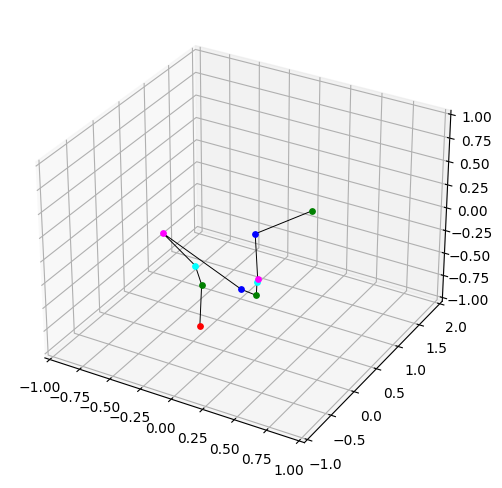

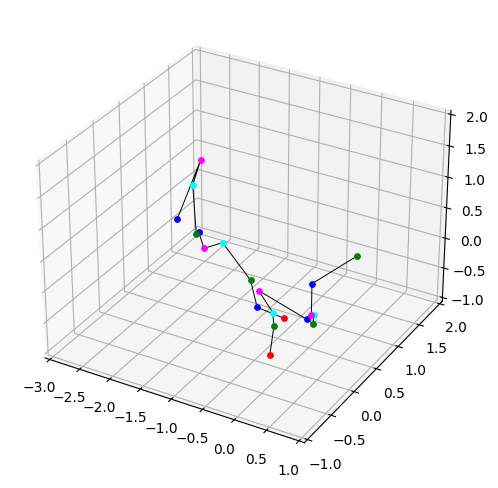

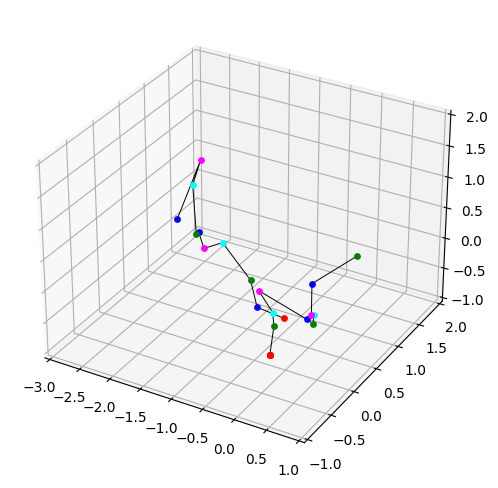

In [26]:
main_menu()

## Построение графиков зависимостей средней дистанции от числа шагов